<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/FashionMNIST_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets.fashion_mnist import load_data

In [2]:
(X_train, _), (X_test, _) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt

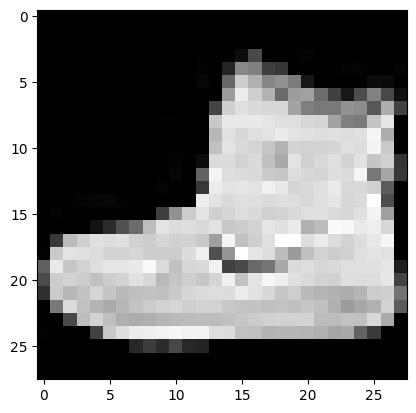

In [4]:
plt.imshow(X_train[0], cmap='gray');

In [5]:
X_train.shape[0] + X_test.shape[0]

70000

In [6]:
# okey dokey

In [7]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [8]:
X_train.max()

1.0

In [9]:
from keras import layers
from keras import Model, Input

In [10]:
input_layer = Input(shape=(28, 28, 1))

x = layers.Conv2D(28, (2, 2), padding='same')(input_layer)
x = layers.MaxPool2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (2, 2), padding='same')(x)
x = layers.MaxPool2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (2, 2), padding='same')(x)

x = layers.Conv2D(8, (2, 2), padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (2, 2), padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output_layer = layers.Conv2D(1, (2, 2), activation='relu', padding='same')(x)

autoencoder = Model(input_layer, output_layer)

In [11]:
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)

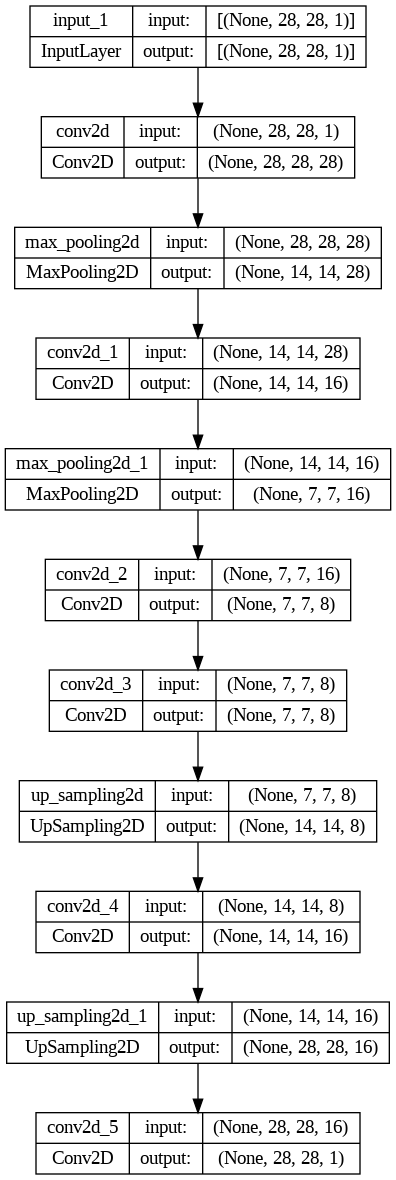

In [12]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [13]:
autoencoder.fit(
    X_train, X_train,
    validation_data=(X_test, X_test),
    epochs=15,
    shuffle=True,
    verbose=2
)

Epoch 1/15
1875/1875 - 16s - loss: 0.3448 - val_loss: 0.3234 - 16s/epoch - 8ms/step
Epoch 2/15
1875/1875 - 7s - loss: 0.3243 - val_loss: 0.3151 - 7s/epoch - 4ms/step
Epoch 3/15
1875/1875 - 8s - loss: 0.3119 - val_loss: 0.3085 - 8s/epoch - 4ms/step
Epoch 4/15
1875/1875 - 8s - loss: 0.3098 - val_loss: 0.3170 - 8s/epoch - 4ms/step
Epoch 5/15
1875/1875 - 7s - loss: 0.3071 - val_loss: 0.3311 - 7s/epoch - 4ms/step
Epoch 6/15
1875/1875 - 8s - loss: 0.3114 - val_loss: 0.3298 - 8s/epoch - 4ms/step
Epoch 7/15
1875/1875 - 8s - loss: 0.3218 - val_loss: 0.3049 - 8s/epoch - 4ms/step
Epoch 8/15
1875/1875 - 7s - loss: 0.3091 - val_loss: 0.3083 - 7s/epoch - 4ms/step
Epoch 9/15
1875/1875 - 8s - loss: 0.3167 - val_loss: 0.3129 - 8s/epoch - 4ms/step
Epoch 10/15
1875/1875 - 7s - loss: 0.3084 - val_loss: 0.3104 - 7s/epoch - 4ms/step
Epoch 11/15
1875/1875 - 7s - loss: 0.3047 - val_loss: 0.3034 - 7s/epoch - 4ms/step
Epoch 12/15
1875/1875 - 8s - loss: 0.3089 - val_loss: 0.3012 - 8s/epoch - 4ms/step
Epoch 13/15

In [14]:
pred = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


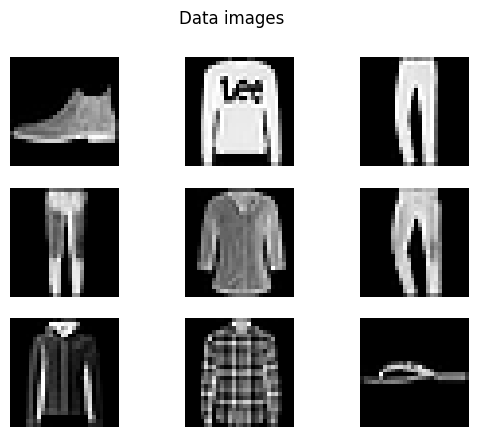

In [20]:
plt.suptitle('Data images')
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.imshow(X_test[i], cmap='gray');

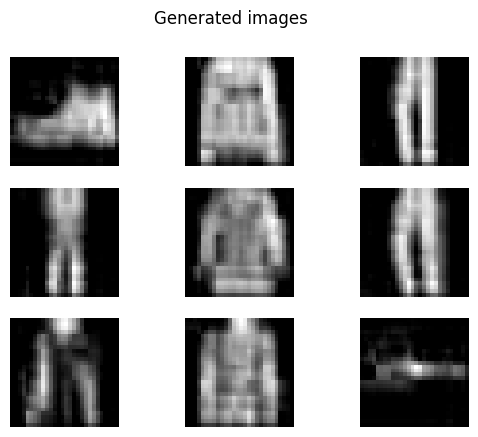

In [19]:
plt.suptitle('Generated images')
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.imshow(pred[i], cmap='gray');